(DrawingGraphs)=
# Drawing Graphs

>*Above all else show the data.*
>
>--Edward Tufte[^note1]

Visualising data is one of the most important tasks facing the data analyst. It's important for two distinct but closely related reasons. Firstly, there's the matter of drawing "presentation graphics": displaying your data in a clean, visually appealing fashion makes it easier for your reader to understand what you're trying to tell them. Equally important, perhaps even more important, is the fact that drawing graphs helps *you* to understand the data. To that end, it's important to draw "exploratory graphics" that help you learn about the data as you go about analysing it. These points might seem pretty obvious, but I cannot count the number of times I've seen people forget them.

[^note1]: The origin of this quote is Tufte's lovely book *The Visual Display of Quantitative Information*.

```{figure} ../img/graphics/snow_ghost_map2.png
:name: fig-ghostmap
:width: 600px
:align: center

A stylised redrawing of John Snow’s original cholera map. Each small dot represents the location of a cholera case, and each large circle shows the location of a well. As the plot makes clear, the cholera outbreak is centred very closely on the Broad St pump.

```

To give a sense of the importance of this chapter, I want to start with a classic illustration of just how powerful a good graph can be. To that end, {numref}`fig-ghostmap` shows a redrawing of one of the most famous data visualisations of all time: John Snow's 1854 map of cholera deaths. The map is elegant in its simplicity. In the background we have a street map, which helps orient the viewer. Over the top, we see a large number of small dots, each one representing the location of a cholera case. The larger symbols show the location of water pumps, labelled by name. Even the most casual inspection of the graph makes it very clear that the source of the outbreak is almost certainly the Broad Street pump. Upon viewing this graph, Dr Snow arranged to have the handle removed from the pump, ending the outbreak that had killed over 500 people. Such is the power of a good data visualisation.

The goals in this chapter are twofold: firstly, to discuss several fairly standard graphs that we use a lot when analysing and presenting data, and secondly, to show you how to create these graphs in Python. The graphs themselves tend to be pretty straightforward, so in that respect this chapter is pretty simple. Where people usually struggle is learning how to produce graphs, and especially, learning how to produce good graphs.[^note2] Fortunately, learning how to draw graphs in Python is reasonably simple, as long as you're not too picky about what your graph looks like. What I mean when I say this is that Python has a lot of good graphing functions, and most of the time you can produce a clean, high-quality graphic without having to learn very much about the low-level details of how Python handles graphics. Unfortunately, on those occasions when you do want to do something non-standard, or if you need to make highly specific changes to the figure, you actually do need to learn a fair bit about these details; and those details are both complicated and boring. With that in mind, the structure of this chapter is as follows: I'll start out by giving you a very quick overview of how graphics work in Python. I'll then discuss several different kinds of graph and how to draw them, as well as showing the basics of how to customise these plots. In a future version of this book, I intend to finish this chapter off by talking about what makes a good or a bad graph, but I haven't yet had the time to write that section.

[^note2]: I should add that this isn't unique to Python. Like everything in Python, there's a pretty steep learning curve to learning how to draw graphs, and like always there's a massive payoff at the end in terms of the quality of what you can produce. But to be honest, I've seen the same problems show up regardless of what system people use. I suspect that the hardest thing to do is to force yourself to take the time to think deeply about what your graphs are doing. I say that in full knowledge that only about half of my graphs turn out as well as they ought to. Understanding what makes a good graph is easy: actually designing a good graph is *hard*.

(graphics)=

## An overview of Python graphics

Reduced to its simplest form, you can think of a Python graphic as being much like a painting. You start out with an empty canvas. Every time you use a graphics function, it paints some new things onto your canvas. Later on, you can paint more things over the top if you want; but just like painting, you can't "undo" your strokes. If you make a mistake, you have to throw away your painting and start over. Fortunately, this is way more easy to do when using Python than it is when painting a picture in real life: you delete the plot and then type a new set of commands.[^note3] This way of thinking about drawing graphs is referred to as the **_painter's model_**. So far, this probably doesn't sound particularly complicated, and for the vast majority of graphs you'll want to draw it's exactly as simple as it sounds. Much like painting in real life, the headaches usually start when we dig into details. To see why, I'll  expand this "painting metaphor" a bit further just to show you the basics of what's going on under the hood, but before I do I want to stress that you really don't need to understand all these complexities in order to draw graphs. I'd been using Python for years before I even realised that most of these issues existed! However, I don't want you to go through the same pain I went through every time I inadvertently discovered one of these things, so here's a quick overview.

When you paint a picture, you need to paint it **with** something. Maybe you want to do an oil painting, but maybe you want to use watercolour. And, generally speaking, you pretty much have to pick one or the other. The analog to this in Python is a plotting library. A plotting library is a collection of commands about what to draw and where to draw it. In scientific plotting in Python, this usually comes down to something called [_matplotlib_](https://matplotlib.org). `Matplotlib` is a very powerful collection of paints and brushes that allows you to be quite creative and make some lovely and customized figures, but it can be a real pain to work with at times. Fortunately, there are ways to ease the pain. In this book, we will mostly produce figures with the library [_seaborn_](https://seaborn.pydata.org), whose purpose is to make it easier to produce statistical figures with `matplotlib`. `Seaborn` greatly simplifies the process of data visualization in Python, and this is why we will rely on it so heavily. `Seaborn`'s simplicity is both its strength and its weakness, however, and sooner or later, you will probably need to dip into `matplotlib` to make your painting just the way you want it. Luckily for us, because `seaborn` is built on top of `matplotlib`, using one doesn't rule out the other. In keeping with our painting analogy, perhaps we can think of `seaborn` a bit like a stencil, that lets us quickly make a nice image. But there's nothing to stop us from coloring outside the lines if we want to.

Thirdly, a painting is usually done in a particular **style**. Maybe it's a still life, maybe it's an impressionist piece, or maybe you're trying to annoy me by pretending that cubism is a legitimate artistic style. Regardless, each artistic style imposes some overarching aesthetic and perhaps even constraints on what can (or should) be painted using that style. `Seaborn` has an opinion about how plots should look, and how they should be created; it has a nice, clean style that I personally like, but it definitely is a style.

At this point, I think we've covered more than enough background material. The point that I'm trying to make by providing this discussion isn't to scare you with all these horrible details, but rather to try to convey to you the fact that Python doesn't really provide a single coherent graphics system. Instead, Python itself provides a platform, and different people have built different graphical tools using that platform. As a consequence of this fact, there's (once again!) many different ways to achieve the goal of drawing graphs with Python. At this stage you don't need to understand these complexities, but it's useful to know that they're there. For now, I think we can be happy with a simpler view of things: to the extent possible, we'll draw pictures using `seaborn`, and dip into `matplotlib` as needed.

So let's start painting.

[^note3]: Of course, if you are using something like a Jupyter notebook to write your code (and you are doing that, right?), this is even easier, since all you have to do is edit your script and then run it again.


(introplotting)=

## An introduction to plotting

Before I discuss any specialised graphics, let's start by drawing a few very simple graphs just to get a feel for what it's like to draw pictures using Python and `seaborn`. To that end, let's start by importing `seaborn`, and create a small list called `Fibonacci` that contains a few numbers we'd like Python to draw for us. The customary abbreviation for `seaborn` is `sns`, so let's use that. We'll use our list `Fibonacci` to provide the values for the y-axis, but of course, we'll need something for the x-axis as well. Since `Fibonacci` contains 7 digits, we'll create another list, `x`, which has increasing integers from 1 to 7. Then we'll use `seaborn` to plot the x and y axes against each other:

<AxesSubplot:>

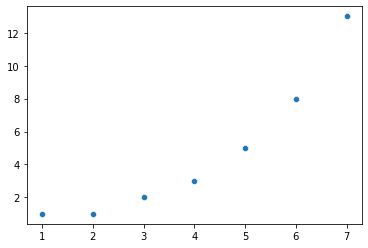

In [1]:
import seaborn as sns
fibonacci = [1,1,2,3,5,8,13]
x = [1,2,3,4,5,6,7]
sns.scatterplot(x = x, y = fibonacci)

### A little color

Already, we can see `seaborn`'s opinion expressing itself in a variety of subtle ways. For example, it has chosen a size and color for the points in the scatterplot. These seem a little small to me, and while blue is a great color, I am partial to orange. So..

<AxesSubplot:>

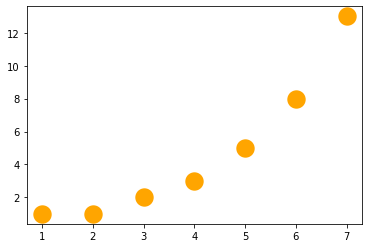

In [2]:
sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')

### Title and axis labels

This is great, but a good figure should have a title, and axis labels. You would think this was straightforward. After all, shouldn't all figures have these things by default? After all, we're not making [Bezos charts](https://twitter.com/jsnell/status/481863414180896769) here, right? It's not quite as easy as you'd expect, but it's not so bad, either. The easiest way to add titles and labels to your figure is to first put your figure into a variable, and then `set` the title and axis labels of that variable. Sounds complicated, but it's ok, once you get used to it. By convention, the variable for storing the figure is called `ax`.[^note4]

Once the figure is safely stored inside of `ax`[^note5], we can use `.set` to set the title and axis labels:

[^note4]: `ax` for "axis", I assume. I think this name harkens back to a different programming language, MATLAB, which inspired `pyplot`, which is part of `matplotlib`, which is... well, anyway... it's often called `ax`, ok?

[^note5]: Actually, you can also apply `set` directly to the initial command creating the figure, like this: `sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange').set(title = 'My first plot', xlabel = 'My x-axis', ylabel='My y-axis')` but most of the time when preparing a figure it is useful to store it as a variable, so you might as well get in the habit now.

[Text(0.5, 1.0, 'My first plot'),
 Text(0.5, 0, 'My x-axis'),
 Text(0, 0.5, 'My y-axis')]

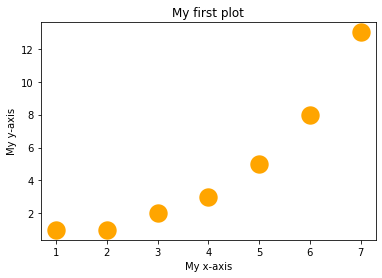

In [3]:
ax = sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')
ax.set(title = 'My first plot', xlabel = 'My x-axis', ylabel='My y-axis')

### Font size and related matters

Now that we have a title and axis labels, it would be nice to change the size of the text. At least, my weak eyes wouldn't mind bumping it up a little bit. As always, there is more than one way to do this, but a simple approach is to use what `seaborn` calls "contexts". Remember, `seaborn` is all about providing a quick way to make an attractive graph without messing around too much with `matplotlib`. So while you _can_ dive in and set everything manually, using the `matplotlib` guts that `seaborn` tidly covers over, the `seaborn` way is to just to just say "Hey, I want to make a plot for my presentation, please make it look ok." This is what `context` does. With the `context` command, you tell `seaborn` if your figure is going to remain in a jupyter notebook, or whether it is for some other purpose. Your options are: "paper", "notebook", "talk", and "poster". You can then supply `seaborn` with a `font_scale`, which is basically a number telling `seaborn` how much larger than the default font size (1) you would like your text to be. `seaborn` then adjusts things and tries to make it work.

An important side-note on context: if you are working in jupyter notebook like the one I am writing this book in, once you set the `seaborn` context, it will continue to use that context within the notebook, unless you change it. This could be good or bad, depending on what you want, but it is worth keeping in mind, if you plots don't look like you expect.

[Text(0.5, 1.0, 'My first plot'),
 Text(0.5, 0, 'My x-axis'),
 Text(0, 0.5, 'My y-axis')]

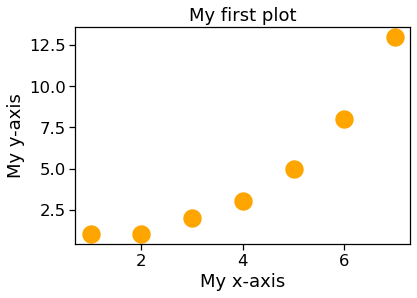

In [4]:
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')
ax.set(title = 'My first plot', 
       xlabel = 'My x-axis', 
       ylabel='My y-axis')

Notice that not only did `seaborn` change the font size for the title and labels, but it also increased the size of the tick-marks on the axes, and changed the size of the numbers on the axes as well, with the added consequence that while we used to have numbers from one to seven on the x-axis, we now only have numbers 2, 4, and 6. `seaborn` has opinions about what looks good, remember, and its opinions might or might now suit your needs. Most of the time, `seaborn` will make reasonable decisions, and will make you a decent-looking plot, but you do need to keep an eye on what it is up to. Luckily, if it makes a choice that you don't like, you can always dip down into `matplotlib` and touch things up to get them just the way you want. Going through all the options in `matplotlib` is beyond the scope of this book though, and there are many good resources out there to help you; mostly if you run into a problem, you just need to do some internet searching, and you will find someone who had a similar problem, and received good (and possibly contradictory!) advice on sites like [stackoverflow](https://stackoverflow.com). Sooner or later, this is where all coders end up in their search for answers to coding problems. Goodness knows this Python translation of Learning Statistics with R would never have happened without copious consulation of stackoverflow and similar sites.

### Open the box

`seaborn` has quite more customization options that you will probably want to know about, but many of them are more applicable to more complex figures, so I'll wait to mention them until later. For now, though, I just want to show you one more option: removing the top and right lines of the box that `seaborn` draws around the data. To me, these make the data feel cramped, and I'd rather give them room to breathe and flourish. So I like to use the `despine` command to remove these, and give the data a little elbow room. `seaborn` has its opinions, and I have mine!

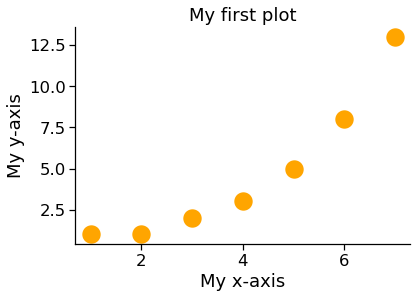

In [5]:
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(x = x, y = fibonacci, s = 400, color = 'orange')
ax.set(title = 'My first plot', 
       xlabel = 'My x-axis', 
       ylabel='My y-axis')
sns.despine(top = True, right = True)

## Plotting more complex data

At this point, we have seen how to make a fairly attractive plot (if I may say so myself) using `seaborn`. However, ususally the data we want to plot are more complicated than this simple series of numbers. `seaborn` has many good options for plotting complex data, but it is happiest if those data are stored in a structured format called a "dataframe". We talked about dataframes back in the chapter called [More Python concepts](mechanics) and will meet them again and again throughout this book. A dataframe is a kind of structured data with columns and rows, just a like a spreadsheet, and having your data organized in a dataframe will make working with `seaborn` much easier. We'll use `pandas` to organize our data in dataframes. So, let's grab some data, put it in a dataframe, and talk more seriously about some real life graphics that you'll want to draw.

You can read more about importing data from a .csv file [here](loadingcsv). The key line in the code below is `afl_margins = pd.read_csv('afl_margins.csv')`. The rest is just a convenience for me in writing this book. If you put the full path to your data between the quotation marks, you should be alright without the rest.

In [6]:
import os
import pandas as pd
from pathlib import Path

cwd = os.getcwd()
os.chdir(str(Path(cwd).parents[0]) + '/Data')

afl_margins = pd.read_csv('afl_margins.csv')

Just to remind ourselves what the data look like, we can use `head` to take a peek:

In [7]:
afl_margins.head()

,afl.margins
0,56
1,31
2,56
3,8
4,32


(histograms)=
### Histograms

We can begin with the humble **_histogram_**. Histograms are one of the simplest and most useful ways of visualising data. They make most sense when you have an interval or ratio scale (e.g., the `afl_margins` data from the chapter on [descriptive statistics](descriptives)) and what you want to do is get an overall impression of the data. Most of you probably know how histograms work, since they're so widely used, but for the sake of completeness I'll describe them. All you do is divide up the possible values into **_bins_**, and then count the number of observations that fall within each bin. This count is referred to as the frequency of the bin, and is displayed as a bar: in the AFL winning margins data, there are 33 games in which the winning margin was less than 10 points, and it is this fact that is represented by the height of the leftmost bar in the figure below. Drawing this histogram with `seaborn` is pretty straightforward. The function you need to use is called `histplot`, and it has pretty reasonable default settings.

By the way, I am going to change the `seaborn` context back to the default settings here, so that my figures will look as consistent as possible with yours, if you are following along at home.

<AxesSubplot:xlabel='afl.margins', ylabel='Count'>

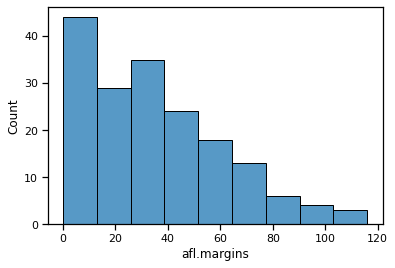

In [8]:
import seaborn as sns
sns.set_context("notebook", font_scale = 1)
sns.histplot(data = afl_margins, x="afl.margins")

Although this image would need some cleaning up in order to make a good presentation graphic (i.e., one you'd include in a report), it nevertheless does a pretty good job of describing the data. In fact, the big strength of a histogram is that (properly used) it does show the entire spread of the data, so you can get a pretty good sense about what it looks like. The downside to histograms is that they aren't very compact: unlike some of the other plots I'll talk about it's hard to cram 20-30 histograms into a single image without overwhelming the viewer. And of course, if your data are nominal scale (e.g., the `afl_finalists` data) then histograms are useless.


The main subtlety that you need to be aware of when drawing histograms is determining where the "breaks" that separate bins should be located, and (relatedly) how many bins there should be. In the figure above, you can see that `seaborn` has made pretty sensible choices all by itself: the breaks are located at 0, 10, 20, ... 120, which is exactly what I would have done had I been forced to make a choice myself. On the other hand, consider the following two histograms, which have divided the data into fewer and more bins, respectively:

Text(0.5, 1.0, 'Too many bins!')

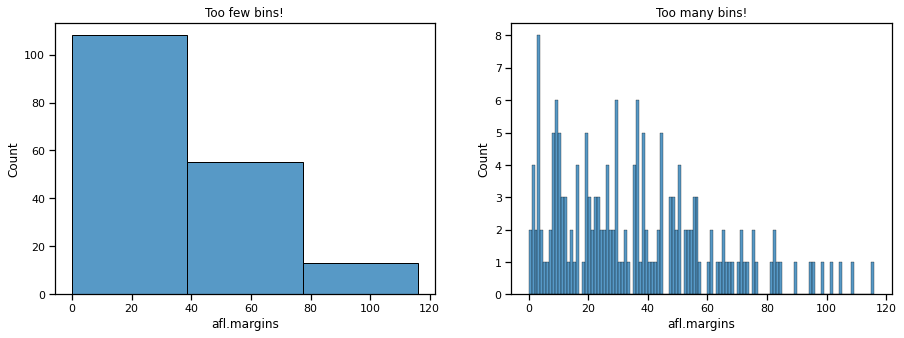

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.histplot(data = afl_margins, x="afl.margins", bins = 3, ax=axes[0])
ax2 = sns.histplot(data = afl_margins, x="afl.margins", bins = 116, ax=axes[1])

axes[0].set_title("Too few bins!")
axes[1].set_title("Too many bins!")


In the plot to the right, the bins are only 1 point wide. As a result, although the plot is very informative (it displays the entire data set with no loss of information at all!) the plot is very hard to interpret, and feels quite cluttered. On the other hand, the plot to the left has a bin width of 50 points, and has the opposite problem: it's very easy to "read" this plot, but it doesn't convey a lot of information. One gets the sense that this histogram is hiding too much. In short, the way in which you specify the number of bins has a big effect on what the histogram looks like, so it's important to make sure you choose the breaks sensibly. In general `seaborn` does a pretty good job of selecting the breaks on its own, but nevertheless it's usually a good idea to play around with the bins a bit to see what happens.

(boxplots)=
### Boxplots

A great alternative to histograms is the **_boxplot_**, sometimes called a "box and whiskers" plot. Like histograms, they're most suited to interval or ratio scale data. The idea behind a boxplot is to provide a simple visual depiction of the median, the interquartile range, and the range of the data. And because they do so in a fairly compact way, boxplots have become a very popular statistical graphic, especially during the exploratory stage of data analysis when you're trying to understand the data yourself. Let's have a look at how they work, again using the `afl_margins` data as our example. Firstly, let's actually calculate these numbers ourselves using the `describe()` function:

In [10]:
afl_margins.describe()

,afl.margins
count,176.000000
mean,35.301136
std,26.073636
min,0.000000
25%,12.750000
50%,30.500000
75%,50.500000
max,116.000000


So how does a boxplot capture these numbers? The easiest way to describe what a boxplot looks like is just to draw one. The function for doing this in `seaborn` is (surprise, surprise) `boxplot()`. As always there's a lot of optional arguments that you can specify if you want, but for the most part you can just let R choose the defaults for you. That said, I'm going to override one of the defaults to start with by specifying the `range` option, but for the most part you won't want to do this (I'll explain why in a minute). With that as preamble, let's try the following command:

<AxesSubplot:ylabel='afl.margins'>

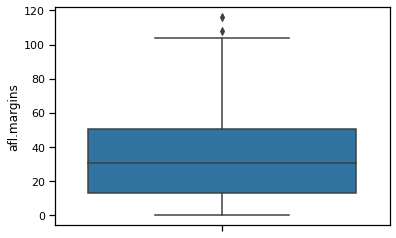

In [11]:
sns.boxplot(data = afl_margins, y = 'afl.margins')

When you look at this plot, this is how you should interpret it: the line in the middle of the box is the median; the box itself spans the range from the 25th percentile to the 75th percentile, and the "whiskers" extend to 1.5 times the interquartile range. The two points above the top whisker represent "extreme values", that is, points that fall outside the range of the whiskers.

One small note on the code above: since we are now drawing from data in a dataframe, rather then simply using lists as our data, like we did for the first scatterplots with the `fibonacci` data, there are two changes to the way we tell `seaborn` to make a plot. First, we specify the dataframe that stores the data by writing `data = afl_margins`. Second, we told `seaborn` which column in `afl_margins` to look in for the data by using the name of the column in quotes: `y = 'afl.margins'`. 

In the example above, we made a vertical boxplot, which in this case resulted in a fairly squat-looking boxplot. As an alternative, we could display the data on the x-axis instead, which will result in a horizontal boxplot.

<AxesSubplot:xlabel='afl.margins'>

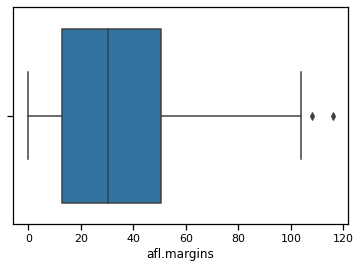

In [12]:
sns.boxplot(data = afl_margins, x = 'afl.margins')

Because the boxplot automatically (unless you change the range argument) separates out those observations that lie within a certain range, people often use them as an informal method for detecting outliers: observations that are “suspiciously” distant from the rest of the data. Here’s an example. Suppose that I’d drawn the boxplot for the AFL margins data, and it came up looking like the one below. It’s pretty clear that something funny is going on with one of the observations. Apparently, there was one game in which the margin was over 300 points! That doesn’t sound right to me. Now that I’ve become suspicious, it’s time to look a bit more closely at the data.

<AxesSubplot:xlabel='afl.margins'>

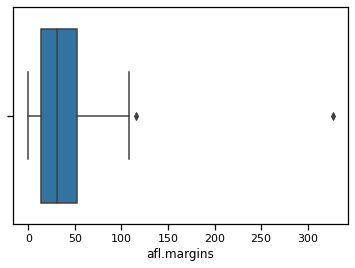

In [13]:
afl_margins.loc[177] = 327
sns.boxplot(data = afl_margins, x = 'afl.margins')

In [14]:
afl_margins[afl_margins['afl.margins'] > 300]

,afl.margins
177,327


Aha! Game 177 had a margin of 327. Now, in this case this should come as no surprise to me, since I added this data point myself with the code `afl_margins.loc[177] = 327` above. But if we play along for a minute, then a game with a margin of 327 definitely doesn't sound right. So then I go back to the original data source (the internet!) and I discover that the actual margin of that game was 33 points. Now it's pretty clear what happened. Someone must have typed in the wrong number. Easily fixed, just by typing `afl_margins.loc[177] = 33`.   While this might seem like a silly example, I should stress that this kind of thing actually happens a lot. Real world data sets are often riddled with stupid errors, especially when someone had to type something into a computer at some point. In fact, there's actually a name for this phase of data analysis, since in practice it can waste a huge chunk of our time: **_data cleaning_**. It involves searching for typos, missing data and all sorts of other obnoxious errors in raw data files.

What about the real data? There is still that *other* extreme point at 116. Does the value of 116 constitute a funny observation not? Possibly. As it turns out the game in question was Fremantle v Hawthorn, and was played in round 21 (the second last home and away round of the season). Fremantle had already qualified for the final series and for them the outcome of the game was irrelevant; and the team decided to rest several of their star players. As a consequence, Fremantle went into the game severely underpowered. In contrast, Hawthorn had started the season very poorly but had ended on a massive winning streak, and for them a win could secure a place in the finals. With the game played on Hawthorn's home turf[^note7] and with so many unusual factors at play, it is perhaps no surprise that Hawthorn annihilated Fremantle by 116 points. Two weeks later, however, the two teams met again in an elimination final on Fremantle's home ground, and Fremantle won comfortably by 30 points.[^note8]

So, should we exclude the game from subsequent analyses? If this were a psychology experiment rather than an AFL season, I'd be quite tempted to exclude it because there's pretty strong evidence that Fremantle weren't really trying very hard: and to the extent that my research question is based on an assumption that participants are genuinely trying to do the task. On the other hand, in a lot of studies we're actually interested in seeing the full range of possible behaviour, and that includes situations where people decide not to try very hard: so excluding that observation would be a bad idea. In the context of the AFL data, a similar distinction applies. If I'd been trying to make tips about who would perform well in the finals, I would have (and in fact did) disregard the Round 21 massacre, because it's way too misleading. On the other hand, if my interest is solely in the home and away season itself, I think it would be a shame to throw away information pertaining to one of the most distinctive (if boring) games of the year. In other words, the decision about whether to include outliers or exclude them depends heavily on *why* you think the data look they way they do, and what you want to use the data *for*. Statistical tools can provide an automatic method for suggesting candidates for deletion, but you really need to exercise good judgment here. As I've said before, Python is a mindless automaton. It doesn't watch the footy, so it lacks the broader context to make an informed decision. You are *not* a mindless automaton, so you should exercise judgment: if the outlier looks legitimate to you, then keep it. In any case, let's return to our discussion of how to draw boxplots.

[^note7]: Sort of. The game was played in Launceston, which is a de facto home away from home for Hawthorn.
[^note8]: Contrast this situation with the next largest winning margin in the data set, which was Geelong's 108 point demolition of Richmond in round 6 at their home ground, Kardinia Park. Geelong have been one of the most dominant teams over the last several years, a period during which they strung together an incredible 29-game winning streak at Kardinia Park. Richmond have been useless for several years. This is in no meaningful sense an outlier. Geelong have been winning by these margins (and Richmond losing by them) for quite some time. Frankly I'm surprised that the result wasn't more lopsided: as happened to Melbourne in 2011 when Geelong won by a modest 186 points.

(multipleboxplots)=

### Drawing multiple boxplots

One last thing. What if you want to draw multiple boxplots at once? Suppose, for instance, I wanted separate boxplots showing the AFL margins not just for 2010, but for every year between 1987 and 2010. To do that, the first thing we'll have to do is find the data. These are stored in the `aflsmall2.csv` file. So let's load it and take a quick peek at what's inside:

In [15]:
cwd = os.getcwd()
os.chdir(str(Path(cwd).parents[0]) + '/Data')

df = pd.read_csv('afl2small.csv')
df.head()

,margin,year
0,33,1987
1,59,1987
2,45,1987
3,91,1987
4,39,1987


With `df.head` we can peek at the first few rows of the dataframe, and see that indeed it has one column with game margins, and another column with the year the game was played. The first five are indeed from 1987. `pandas` also lets us peek at the _last_ few rows, with `tail`:

In [16]:
df.tail()

,margin,year
4291,5,2010
4292,41,2010
4293,24,2010
4294,0,2010
4295,56,2010


and these games are from 2010, also as we might expect, so everything looks good. Incidently, these data are arranged in what is known as _long_ format, with all the margins in one column, and a second column indicating the year. This is as opposed to _wide_ format, in which there would be a separate column for every year. We'll return to these in following chapter on [data wrangling](datawrangling).

To plot these data, we just need to call up `boxplot()` once again, give `seaborn` the name of our dataframe, set the x-axis to "year" and the y-axis to "margin".

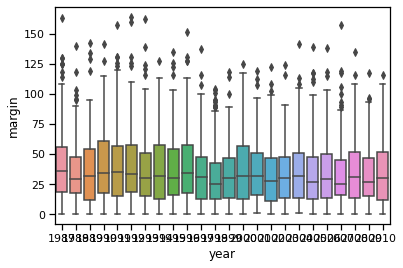

In [17]:
ax = sns.boxplot(x = 'year', y = 'margin', data = df)

Clearly, there are things we could do to touch this figure up, but at least it gives a sense of why it's sometimes useful to choose boxplots instead of histograms. Even before taking the time to turn this basic output into something more readable, it's possible to get a good sense of what the data look like from year to year without getting overwhelmed with too much detail. Now imagine what would have happened if I'd tried to cram 24 histograms into this space: no chance at all that the reader is going to learn anything useful.

### Alternatives to boxplots

Boxplots are a very effective way to summarize data visually, but there are other methods that are worth pointing out. In the figure below, the same data (AFL game margins in the years 2005-2010) represented in three different ways. In the first panel, we see the boxplot, which we already know and love. The middle panel simply plots the data points. All of them. This approach, `stripplot`, shifts (or, as we say in the scientific plotting business, "jitters") the points slightly on the x-axis, so that they don't overlap each other. In the `stripplot`, we can't see exactly where the median or quartiles lie, for instance, like we can in the boxplot, but we can actually see all the data, which I tend to be in favor of. To me, in the boxplots, it sort of looks like all the data points lie inside the box, even though I know that of course this is not true. Then again, although the random jitter insures that the points don't all lie on top of each other, it is still a little difficult to get a feeling for how where most of the points lie. The third plot, in the panel to the right, attempts to solve this problem. This is a `violinplot`, in which the width of the colored area indicates the _density_ of data points. Thus, by looking at where the figure is wide and where it is thin, we can get an intuitive feeling for where most of the points lie. 

#### A word of caution on violin plots
An important point to stress is that while every part of the boxplot and stripplot represent exact features of the data, the shape of the violinplot is an estimate (a kernal density estimate, if you want to get techinical), that attempts to show the underlying distribution that produced the data. This will of course always be a best guess, since the true distribution is unknowable, in most cases. Because violin plots show distribution estimates, they cannot be interpreted in exactly the same way as, say, a boxplot. A glance at the y-axes in the figure below shows why. While the boxplots and strip plots share an identical y axis, the violin plot's y-axis is different. If you look at the bottom, for instance, you will see that it extends below zero, and a winning margin of e.g. -1 is nonsensical. But this is because kernal density estimators don't know anything about how games are decided in the Australian Football League. They just look at the data, and make a best guess about the distribution that these data were sampled from. So violin plots are very informative, especially in cases where they actually are violin-shaped, indicating that the data may come from a distribution with more than one peak, you have to remember what you are looking at, and not confuse them with curvy boxplots. Perhaps to alleviate this problem, the default setting in `seaborn` is to draw a little mini boxplot inside the violin plot.



In [18]:
cwd = os.getcwd()
os.chdir(str(Path(cwd).parents[0]) + '/Data')

df = pd.read_csv('afl2small.csv')
df = df[df['year'] > 2004]

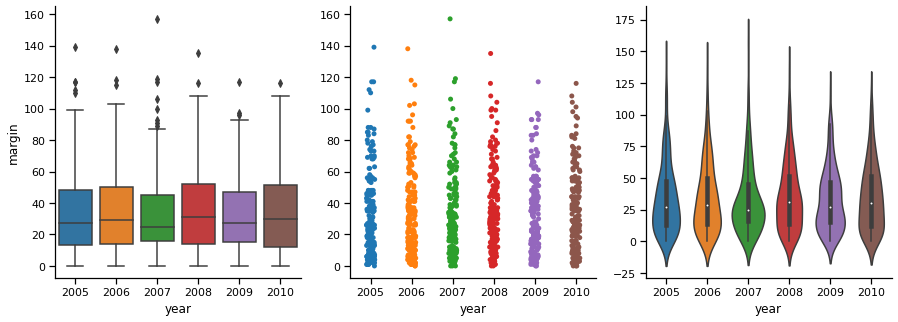

In [19]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.boxplot(x = 'year', y = 'margin', data = df, ax=axes[0])
ax2 = sns.stripplot(x = 'year', y = 'margin', data = df, ax=axes[1])
ax3 = sns.violinplot(x = 'year', y = 'margin', data = df, ax=axes[2])

ax2.set(ylabel = '')
ax3.set(ylabel = '')

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

One final alternative to the plain boxplot that I will show you here is to _overlay_ a strip plot on top of a boxplot. Using this method, you may get the best of both worlds. One potential issue with overlaying plots, though, is that they can obscure each other, concealing information. In the figure below, the panel to the left shows boxplots and the underlying data points in lovely color, but this makes it hard to see the data points when they are on top of the boxes. In the middle panel, this problem is solved by making the data points black. But now it is kind of hard to see the outliers indicated by the boxplots. The panel to the left is the best of the three, in my opinion, because you can see the box indiciating the quartiles, you can see the median, you can see the outliers, and you can see the data points. I think, though, that if I were preparing this plot for publication, I would remove the black diamonds from the boxplots showing the outliers, because you can see the actual data points right next to them, and it just gets confusing. To me, the outliers no longer look like outiers, they just look like weird data points. The moral? Data visualization is hard!

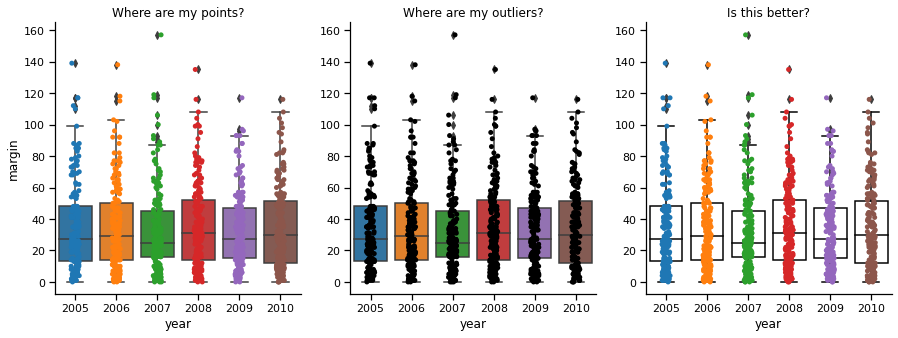

In [20]:
properties = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


ax1 = sns.boxplot(x = 'year', y = 'margin', data = df, ax=axes[0])
ax1 = sns.stripplot(x = 'year', y = 'margin', data=df, ax=axes[0])

ax2 = sns.boxplot(x = 'year', y = 'margin', data = df, ax=axes[1])
ax2 = sns.stripplot(x = 'year', y = 'margin', data=df, color = 'black', ax=axes[1])

ax3 = sns.boxplot(x = 'year', y = 'margin', data = df, **properties, ax=axes[2])
ax3 = sns.stripplot(x = 'year', y = 'margin', data=df, ax=axes[2])

axes[0].set_title("Where are my points?")
axes[1].set_title("Where are my outliers?")
axes[2].set_title("Is this better?")


ax2.set(ylabel = '')
ax3.set(ylabel = '')

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

(scatterplots)=

## Scatterplots

**_Scatterplots_** are a simple but effective tool for visualising data. We've [already seen scatterplots](introplotting) in this chapter, when drawing the `Fibonacci` variable as a collection of dots. However, for the purposes of this section I have a slightly different notion in mind. Instead of just plotting one variable, what I want to do with my scatterplot is display the relationship between *two* variables, like we saw with the figures in the [section on correlation](correlation) It's this latter application that we usually have in mind when we use the term "scatterplot". In this kind of plot, each observation corresponds to one dot: the horizontal location of the dot plots the value of the observation on one variable, and the vertical location displays its value on the other variable. In many situations you don't really have a clear opinions about what the *causal* relationship is (e.g., does A cause B, or does B cause A, or does some other variable C control both A and B). If that's the case, it doesn't really matter which variable you plot on the x-axis and which one you plot on the y-axis. However, in many situations you do have a pretty strong idea which variable you think is most likely to be causal, or at least you have some suspicions in that direction. If so, then it's conventional to plot the cause variable on the x-axis, and the effect variable on the y-axis. With that in mind, let's look at how to draw scatterplots in R, using the same `parenthood` data set (i.e. `parenthood.csv`) that I used when introducing the idea of correlations.

In [21]:
from os import chdir as cd
import pandas as pd

pathin = '/Users/ethan/Documents/GitHub/pythonbook/Data/'
file = 'parenthood.csv'

cd(pathin)

df = pd.read_csv(file)
df.head()

,dan.sleep,baby.sleep,dan.grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


Suppose my goal is to draw a scatterplot displaying the relationship between the amount of sleep that I get (`dan.sleep`) and how grumpy I am the next day (`dan.grump`). As you might expect given our earlier use of `scatterplot()` to display the `Fibonacci` data, the function that we use is the `scatterplot()` function. Simple!

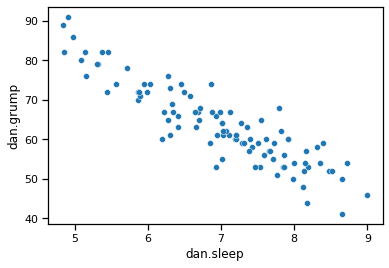

In [22]:
ax = sns.scatterplot(x = 'dan.sleep', y = 'dan.grump', data = df)

This does show a nice clear relationship between hours of sleep and grumpiness, but it would be nice to make that relationship even clearer with a line through the middle of the points. This can be easily done by replacing `scatterplot` with `regplot`. Everything else stays the same:

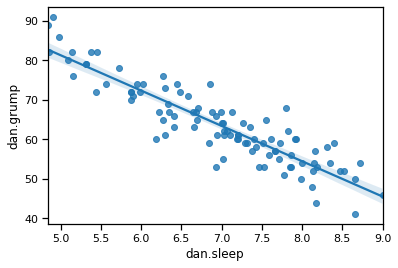

In [23]:
ax = sns.regplot(x = 'dan.sleep', y = 'dan.grump', data = df)

In this case, the line fits the data quite closely. In fact, we could easily see the relationship even without the line. Nevertheless, it is still just a model: the _exact_, true relationship between hours of sleep and grumpiness level is probably unknowable, so the slope of the line represents a best guess, given the data available. This uncertainty is represented by the faint translucent shaded area around the line. This area represents the [confidence interval](ci) of the model. In this case, the shaded area is quite narrow because the model (the line) does a pretty good job of representing the data. In other cases, this shaded area will be larger.

(bargraphs)=

## Bar graphs

Another form of graph that you often want to plot is the **_bar graph_**. To illustrate the use of the function, I'll use the `finalists` variable that I introduced in the section on . What I want to do is draw a bar graph that displays the number of finals that each team has played in over the time spanned by the `afl` data set.

In [24]:
import os
import pandas as pd
from pathlib import Path

cwd = os.getcwd()
os.chdir(str(Path(cwd).parents[0]) + '/Data')

df = pd.read_csv('afl_finalists.csv')

In [25]:
import pandas as pd

# count up the number of times each team has been in the finals
finalists = df['afl.finalists'].value_counts()

# convert the result to a dataframe
df2 = finalists.to_frame()

# convert the row names to a column of data
df2.index.name = 'Team'
df2.reset_index(inplace=True)

# rename columns with clearer names
df2.columns = ['Team', 'Finals']

df2

,Team,Finals
0,Geelong,39
1,West Coast,38
2,Essendon,32
3,Melbourne,28
4,North Melbourne,28
5,Collingwood,28
6,Hawthorn,27
7,Sydney,26
8,Carlton,26
9,Adelaide,26


By now, if you have been following along, you can probably guess the syntax yourself. Specify the x data, specify the y data, and specify the data source:

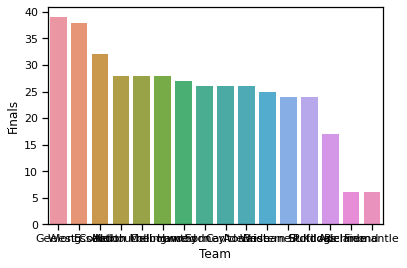

In [26]:
ax = sns.barplot(x = 'Team', y = 'Finals', data = df2)

Lovely, right? Pretty colors! Unfortunately, the team's names are entirely illegible. Sometimes people try to deal with this sort of problem by rotating the x-axis tick labels 45 degrees so that they don't run all over each other. That is an option, but an easy fix to this problem that you should always keep in mind is to simply switch the x an y axes:

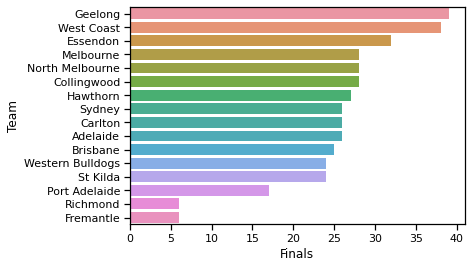

In [27]:
ax = sns.barplot(x = 'Finals', y = 'Team', data = df2)

There, now isn't that better? I haven't been touching up these plots much in this chapter, because I want to focus on how easy is can be to generate nice simple plots, but in this case that y-axis label is just staring me in the face, now that I have turned the bars onto their sides. Normally I would insist that a figure should always have clear axis labels, but presumably, if we are putting this in a paper or presentation, the audience already knows that we are talking about AFL teams, and we could also put this info in the title instead. So let's do a little makeover:

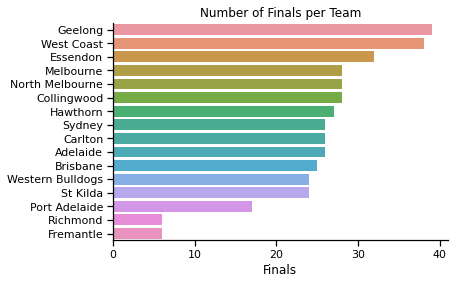

In [28]:
ax = sns.barplot(x = 'Finals', y = 'Team', data = df2)
ax.set(title = 'Number of Finals per Team', xlabel = 'Finals', ylabel='')
sns.despine(top=True, right=True)
sns.set_context("notebook", font_scale=1.5)

Now we're talking! A nice clear figure, that is pretty and easy to read. Yum!

(saveimage)=

## Saving image files

Hold on, you might be thinking. What's the good of being able to draw pretty pictures in Python if I can't save them and send them to friends to brag about how awesome my data is? How do I save the picture? A (fairly) easy solution is to use the `savefig` command from the `pyplot` library in `matplotlib`. I say fairly, because without a few tweaks, it may give you less than desirable results. In particular, I would like to draw your attention to the arguements `facecolor` and `bbox_inches` in the last line of the code below. Without setting `facecolor` to "white" and `bbox_inches` to "tight", the image is saved with a dark background outside of the main area of the figure, and most of the team names get cut off on the margins. Why these settings aren't the default I can't imagine, but there is probably some good reason. In any case, using 'savefig' you can export your figure in a variety of formats. Here I have used the .png format.

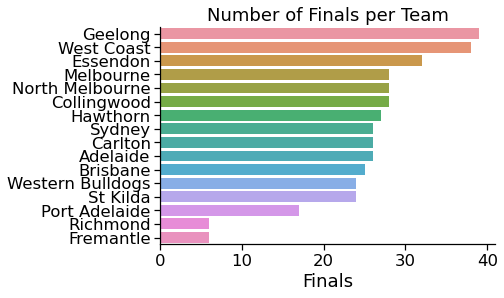

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

ax = sns.barplot(x = 'Finals', y = 'Team', data = df2)
ax.set(title = 'Number of Finals per Team', xlabel = 'Finals', ylabel='')
sns.despine(top=True, right=True)
sns.set_context("paper", font_scale=1.5)


plt.savefig('/Users/ethan/Desktop/AFL.png', facecolor='white', bbox_inches='tight')

## Enough for now

I could go on and on. I really enjoy data visualization because it helps me understand my data, and I have been known to spend waaaay too much time trying to craft the perfect graph when I probably should be getting on with writing the paper. What I have given here is only a quick introducton to some of the most common graph types, and a few options for how to configure them. Much, much, much more is possible, either directly through `seaborn`, or combined with the power of `matplotlib` and other graphics libraries. But alas, the rest of this book isn't going to get written if I stay here all day, so I'll leave it there for now. "Perfection", as a co-author recently informed me, kindly, yet firmly, "is the enemy of the Good". Or in this case, the Good-Enough.